# Project 8 - Recommender System for Movies

## Problem Statement:

- This notebook implements a movie recommender system. 
- Recommender systems are used to suggest movies or songs to users based on their interest or usage history. 
- For example, Netflix recommends movies to watch based on the previous movies you've watched.  
- In this example, we will use Item-based Collaborative Filter 


- Dataset MovieLens: https://grouplens.org/datasets/movielens/100k/ 
- Photo Credit: https://pxhere.com/en/photo/1588369

# Stage 1 - Import the dataset and Libraries:

### Import the Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the Dataset:

##### Dataset 1: Movie titles

In [2]:
data_movies_titles = pd.read_csv("Movie_Id_Titles")

In [3]:
data_movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


##### Dataset 2: Movie Ratings

In [4]:
data_movies_ratings = pd.read_csv('u.data', sep = '\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [5]:
data_movies_ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
data_movies_ratings.tail()

,user_id,item_id,rating,timestamp
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


As it can be seen from the dataframe above, the "timestamp" column presents with data that is not useful at this moment. 

##### Drop the "timestamp" column.

In [7]:
data_movies_ratings.drop(['timestamp'], axis = 1, inplace = True)

In [8]:
data_movies_ratings.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


#### Explore further details of the Dataset:

In [9]:
data_movies_ratings.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [10]:
data_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id    100003 non-null int64
item_id    100003 non-null int64
rating     100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


#### Create the dataset required: Merging Dataset 1 and 2 together:

As both dataset have the same "item_id" column, it will be merge on this column.

In [11]:
data_movies = pd.merge(data_movies_ratings, data_movies_titles, on = 'item_id')

In [12]:
data_movies.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [13]:
data_movies.shape

(100003, 4)

# Stage 2 - Exploratory Data Analysis:

### Describe the data by statistics where Group the dataset by its Title:

In [14]:
data_movies.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.00,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.00,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.00,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.00,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.00,5.0
2 Days in the Valley (1996),93.0,3.225806,0.957000,1.0,3.00,3.0,4.00,5.0
"20,000 Leagues Under the Sea (1954)",72.0,3.500000,0.731581,2.0,3.00,4.0,4.00,5.0
2001: A Space Odyssey (1968),259.0,3.969112,1.026307,1.0,3.00,4.0,5.00,5.0
3 Ninjas: High Noon At Mega Mountain (1998),5.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


## Visualise the highest rated movies:

In [15]:
# Get the mean rating of the movies: 'mean' column

data_movies.groupby('title')['rating'].describe()['mean']

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [16]:
# Get the count of each movie titles: 'count' column
data_movies.groupby('title')['rating'].describe()['count']

title
'Til There Was You (1997)                                     9.0
1-900 (1994)                                                  5.0
101 Dalmatians (1996)                                       109.0
12 Angry Men (1957)                                         125.0
187 (1997)                                                   41.0
2 Days in the Valley (1996)                                  93.0
20,000 Leagues Under the Sea (1954)                          72.0
2001: A Space Odyssey (1968)                                259.0
3 Ninjas: High Noon At Mega Mountain (1998)                   5.0
39 Steps, The (1935)                                         59.0
8 1/2 (1963)                                                 38.0
8 Heads in a Duffel Bag (1997)                                4.0
8 Seconds (1994)                                              4.0
A Chef in Love (1996)                                         8.0
Above the Rim (1994)                                          5.0
Abso

In [17]:
data_movies_MeanRatings = data_movies.groupby('title')['rating'].describe()['mean']
data_movies_CountTitles = data_movies.groupby('title')['rating'].describe()['count']

#### Create new dataset for the mean and the count:

In [18]:
MeanCountRatings_df = pd.concat([data_movies_MeanRatings, data_movies_CountTitles], axis = 1)

In [19]:
MeanCountRatings_df.head()

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


Need to reset the index.

In [20]:
# MeanCountRatings_df = MeanCountRatings_df.reset_index()
MeanCountRatings_df.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
5,2 Days in the Valley (1996),3.225806,93.0
6,"20,000 Leagues Under the Sea (1954)",3.500000,72.0
7,2001: A Space Odyssey (1968),3.969112,259.0
8,3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5.0
9,"39 Steps, The (1935)",4.050847,59.0


In [21]:
MeanCountRatings_df.head()

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


#### Visualise the data:

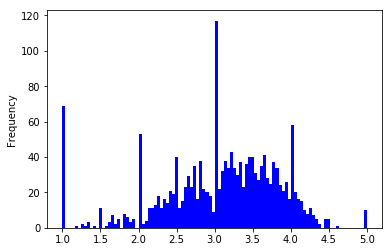

In [22]:
MeanCountRatings_df['mean'].plot(bins = 100, kind = 'hist', color = 'b')

Most of the ratings can be seen to peaking at 1, 2, 3, 4 stars, with little at 5 stars. There are also a good amount of reviews in the 2 to 3 star range and 3 to 4 star range.

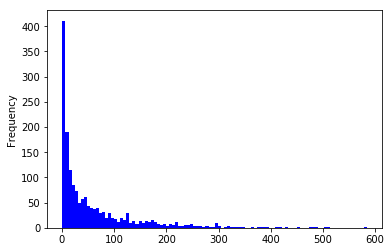

In [23]:
MeanCountRatings_df['count'].plot(bins = 100, kind = 'hist', color = 'b')

Looking at the count of these movies, majority of the reviews are below 100 counts.

### Checkout the Movies of 5 star ratings:

In [24]:
MeanCountRatings_df[MeanCountRatings_df['mean'] == 5]

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


In [25]:
MeanCountRatings_df[MeanCountRatings_df['mean'] == 5].count()

mean     10
count    10
dtype: int64

It seems like there were only 10 counts of 5 star reviewed movie.

### Checkout the rest of the Movies that were rate the most: top 100

In [26]:
MeanCountRatings_df = MeanCountRatings_df.sort_values('count', ascending= False)
MeanCountRatings_df.head(100)

,mean,count
title,,
Star Wars (1977),4.359589,584.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
"English Patient, The (1996)",3.656965,481.0
Scream (1996),3.441423,478.0
Toy Story (1995),3.878319,452.0
Air Force One (1997),3.631090,431.0


# Stage 3 - Make an Item-based Collaborative Filter for the whole Dataset:

In [27]:
list(data_movies['title'].unique())

['Star Wars (1977)',
 'Empire Strikes Back, The (1980)',
 'Gone with the Wind (1939)',
 'Kolya (1996)',
 'L.A. Confidential (1997)',
 'Heavyweights (1994)',
 'Legends of the Fall (1994)',
 'Jackie Brown (1997)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Hunt for Red October, The (1990)',
 'Jungle Book, The (1994)',
 'Grease (1978)',
 'Remains of the Day, The (1993)',
 'Men in Black (1997)',
 "Romy and Michele's High School Reunion (1997)",
 'Star Trek: First Contact (1996)',
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)',
 'Batman Forever (1995)',
 'Only You (1994)',
 'Age of Innocence, The (1993)',
 'Sabrina (1995)',
 'Just Cause (1995)',
 'Endless Summer 2, The (1994)',
 'Man Without a Face, The (1993)',
 'Sabrina (1954)',
 'Die Hard (1988)',
 'Twister (1996)',
 'Toy Story (1995)',
 'Broken Arrow (1996)',
 'Aladdin (1992)',
 'Casper (1995)',
 'Restoration (1995)',
 'Jaws (1975)',
 'Chasing Amy (1997)',
 'Silence of the Lambs, The (1

### Transform the matrix: to User_id vs Movies

In [28]:
pivotTable_usrID_movTitle = data_movies.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
pivotTable_usrID_movTitle.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataframe shows which movies each person watched and have given reviews to.

### Checkout a specific movie: Star wars

In [29]:
starwars = pivotTable_usrID_movTitle['Star Wars (1977)']
startrek = pivotTable_usrID_movTitle['Star Trek: First Contact (1996)']

In [30]:
starwars, startrek

(user_id
 0      5.0
 1      5.0
 2      5.0
 3      NaN
 4      5.0
 5      4.0
 6      4.0
 7      5.0
 8      5.0
 9      5.0
 10     5.0
 11     NaN
 12     4.0
 13     5.0
 14     5.0
 15     5.0
 16     NaN
 17     NaN
 18     4.0
 19     NaN
 20     3.0
 21     3.0
 22     5.0
 23     4.0
 24     NaN
 25     5.0
 26     4.0
 27     3.0
 28     4.0
 29     NaN
       ... 
 914    NaN
 915    NaN
 916    5.0
 917    3.0
 918    NaN
 919    3.0
 920    NaN
 921    4.0
 922    5.0
 923    5.0
 924    5.0
 925    NaN
 926    NaN
 927    NaN
 928    NaN
 929    4.0
 930    2.0
 931    3.0
 932    NaN
 933    4.0
 934    5.0
 935    NaN
 936    4.0
 937    5.0
 938    5.0
 939    NaN
 940    4.0
 941    NaN
 942    5.0
 943    4.0
 Name: Star Wars (1977), Length: 944, dtype: float64, user_id
 0      NaN
 1      4.0
 2      NaN
 3      NaN
 4      NaN
 5      4.0
 6      NaN
 7      NaN
 8      5.0
 9      NaN
 10     NaN
 11     3.0
 12     NaN
 13     3.0
 14     4.0
 15     3.0
 16  

### Correlate this movie with the entire dataset:

In [31]:
starwars_correlations = pd.DataFrame(pivotTable_usrID_movTitle.corrwith(starwars), columns=['Correlation'])
starwars_correlations

/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/y.s.lee/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [32]:
startrek_correlations = pd.DataFrame(pivotTable_usrID_movTitle.corrwith(startrek), columns=['Correlation'])
startrek_correlations

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-1.000000
101 Dalmatians (1996),0.068118
12 Angry Men (1957),-0.130298
187 (1997),-0.042281
2 Days in the Valley (1996),0.212652
"20,000 Leagues Under the Sea (1954)",0.321887
2001: A Space Odyssey (1968),0.104705
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [33]:
starwars_correlations = starwars_correlations.join(MeanCountRatings_df['count'])
startrek_correlations = startrek_correlations.join(MeanCountRatings_df['count'])

In [34]:
starwars_correlations

# Dont forget to comment out the "reset_index()" code from above.

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
2 Days in the Valley (1996),0.066654,93.0
"20,000 Leagues Under the Sea (1954)",0.289768,72.0
2001: A Space Odyssey (1968),0.230884,259.0
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5.0


In [35]:
starwars_correlations.dropna(inplace=True)

In [36]:
starwars_correlations

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9.0
1-900 (1994),-0.645497,5.0
101 Dalmatians (1996),0.211132,109.0
12 Angry Men (1957),0.184289,125.0
187 (1997),0.027398,41.0
2 Days in the Valley (1996),0.066654,93.0
"20,000 Leagues Under the Sea (1954)",0.289768,72.0
2001: A Space Odyssey (1968),0.230884,259.0
"39 Steps, The (1935)",0.106453,59.0


In [37]:
startrek_correlations.dropna(inplace=True)

In [38]:
startrek_correlations

,Correlation,count
title,,
'Til There Was You (1997),1.000000,9.0
1-900 (1994),-1.000000,5.0
101 Dalmatians (1996),0.068118,109.0
12 Angry Men (1957),-0.130298,125.0
187 (1997),-0.042281,41.0
2 Days in the Valley (1996),0.212652,93.0
"20,000 Leagues Under the Sea (1954)",0.321887,72.0
2001: A Space Odyssey (1968),0.104705,259.0
"39 Steps, The (1935)",0.152525,59.0


#### Sort the Correlations:

In [39]:
starwars_correlations.sort_values('Correlation', ascending = False)

,Correlation,count
title,,
Commandments (1997),1.000000,3.0
Cosi (1996),1.000000,4.0
No Escape (1994),1.000000,5.0
Stripes (1981),1.000000,5.0
Man of the Year (1995),1.000000,9.0
Hollow Reed (1996),1.000000,6.0
"Beans of Egypt, Maine, The (1994)",1.000000,2.0
"Good Man in Africa, A (1994)",1.000000,2.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000,5.0


From the above findings:

It might not be worth considering movies with very low count such as "Commandments (1997)" with a count of 3. These could not be very useful. Therefore they can be considered as Outliers.

#### Remove the outliers:

In [40]:
starwars_correlations[starwars_correlations['count']>80].sort_values('Correlation',ascending=False).head()

,Correlation,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0


For example, this dataframe's results can be used to perform simple recommendations based on correlations. If the person has watched "Star Wars" and liked it, the remainding list of movies as seen in the dataframe above can be used for recommendations. As it is most likely that they will enjoy it too.

# Stage 4 - Utilise the Filter method above to make the Recommender System:

In [41]:
pivotTable_usrID_movTitle

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create or calculate the Correlations for all the movies in the Pivot Table above

In [52]:
# Use the Pearson Correlation method, and Only use movies that have more than 80 reviews.
corr_movies = pivotTable_usrID_movTitle.corr(method='pearson', min_periods=70)

In [53]:
corr_movies

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,0.178848,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,-0.001307,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## With the pre-made INPUT DATASET, use the recommender to provide a recommendation.

INPUT -> My_Ratings.csv

In [54]:
myRatings = pd.read_csv('MY_Ratings.csv')
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [55]:
len(myRatings.index)

2

In [56]:
myRatings['Movie Name'][0]

'Liar Liar (1997)'

In [57]:
myRatings['Movie Name'][1]

'Star Wars (1977)'

#### Generate a list of similar movies based on INPUT:

This is done by implementing an accumulator, by a for-loop to check if there are any movies that correlate with the input movie.

In [61]:
similarMovieList = pd.Series()

# for i in range(0, len(myRatings.index)):
for i in range(0, 2):
    
    # Step 1 - Get the same movies with the same ratings:
    similarMovie = corr_movies[ myRatings['Movie Name'][i] ].dropna()
    
    # Step 2 - Assigning a weight and Scale the similarity by the given ratings:
    similarMovie = similarMovie.map(lambda x: x * myRatings['Ratings'][i])
    
    # Step 3 - Append the list of similar movies with findings:
    similarMovieList = similarMovieList.append(similarMovie)

#### Print out the list of movies:

In [62]:
similarMovieList.sort_values(inplace = True, ascending = False)
print(similarMovieList.head(15))

Liar Liar (1997)                             5.000000
Batman Forever (1995)                        2.584838
Mask, The (1994)                             2.423249
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
101 Dalmatians (1996)                        2.348824
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Craft, The (1996)                            1.974149
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
Back to the Future (1985)                    1.890139
dtype: float64


The recommended list of movies are below the movie "Liar Liar (1997)", such as batman Forever (1995) or Indiana Jones and the Last Crusade (1989)